# Scikit_Multiflow- ML for Data streams in python

In [ ]:
pip install -U numpy

In [1]:
pip install -U Cython

In [2]:
pip install -U scikit-multiflow

### There are several methods to use stream data:

1. By Stream Generators
2. By creating stream from a file source
3. By creating stream from a data source (Devices)

#### By Stream Generators

The SEA generator allows you to generate an infinite data stream with 3 inputs and 2 outputs. This particular data stream contains frequent, abrupt concept drift.

In [8]:
from skmultiflow.data import SEAGenerator 

In [9]:
stream = SEAGenerator()      # create a stream
stream.prepare_for_use()     # prepare the stream for use

C:\Users\JaFsi\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


## Handling  Missing Values 
Fill missing values with some defined value.

Provides a simple way to replace missing values in data samples with some value. The imputation value can be set via a set of imputation strategies.

A missing value in a sample can be coded in many different ways, but the most common one is to use numpy’s NaN, that’s why that is the default missing value parameter.

The user should choose the correct substitution strategy for his use case, as each strategy has its pros and cons. The strategy can be chosen from a set of predefined strategies, which are: ‘zero’, ‘mean’, ‘median’, ‘mode’, ‘custom’.

Notice that MissingValuesCleaner can actually be used to replace arbitrary values.

In [15]:
# Imports
import numpy as np
from skmultiflow.data.file_stream import FileStream
from skmultiflow.transform.missing_values_cleaner import MissingValuesCleaner
# Setting up a stream
#stream = FileStream("https://raw.githubusercontent.com/scikit-multiflow/"
 #                   "streaming-datasets/master/covtype.csv")
stream = FileStream("D:/Streaming data set/streaming-datasets-master/covtype.csv")
# Setting up the filter to substitute values -47 by the median of the
# last 10 samples
cleaner = MissingValuesCleaner(-47, 'median', 10)
X, y = stream.next_sample(10)
#print(X)
X[9, 0] = -47
#print(X)
# We will use this list to keep track of values
data = []
# Iterate over the first 9 samples, to build a sample window
for i in range(9):
    X_transf = cleaner.partial_fit_transform([X[i].tolist()])
    data.append(X_transf[0][0])
    
# Transform last sample. The first feature should be replaced by the list's 
# median value
X_transf = cleaner.partial_fit_transform([X[9].tolist()])
np.median(data)
#print(X_transf)

[[2600.5, 59, 10, 247, 11, 636, 228, 219, 124, 6230, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


### Demonstrates how to evaluate one model and visualize the predictions using data points.

In [16]:
%matplotlib notebook

<IPython.core.display.Javascript object>


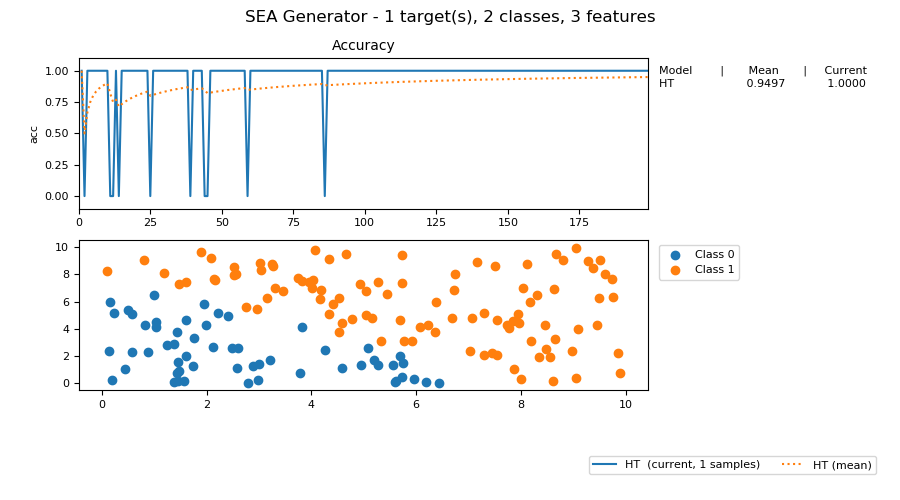

Prequential Evaluation
Evaluating 1 target(s).
Pre-training on 1 sample(s).
Evaluating...
 #################### [100%] [14.49s]
Processed samples: 200
Mean performance:
HT - Accuracy     : 0.9497


[HoeffdingTreeClassifier(binary_split=False, grace_period=200,
                         leaf_prediction='nba', max_byte_size=33554432,
                         memory_estimate_period=1000000, nb_threshold=0,
                         no_preprune=False, nominal_attributes=None,
                         remove_poor_atts=False, split_confidence=1e-07,
                         split_criterion='info_gain', stop_mem_management=False,
                         tie_threshold=0.05)]

In [19]:
# The third example demonstrates how to evaluate one model
# and visualize the predictions using data points.
# Note: You can not in this case compare multiple models
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier
from skmultiflow.evaluation import EvaluatePrequential
# Set the stream
stream = SEAGenerator(random_state=1)
# Set the model
ht = HoeffdingTreeClassifier()
# Set the evaluator
evaluator = EvaluatePrequential(max_samples=200,
                                n_wait=1,
                                pretrain_size=1,
                                max_time=1000,
                                show_plot=True,
                                metrics=['accuracy'],
                                data_points_for_classification=True)
# Run evaluation
evaluator.evaluate(stream=stream, model=ht, model_names=['HT'])